In [ ]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo  # type: ignore
from pandas import DataFrame  # type: ignore

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

data: DataFrame = breast_cancer_wisconsin_diagnostic.data
features: DataFrame = data.features
labels: DataFrame = data.targets
headers: list = data.headers



In [ ]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split  # type: ignore

proportions = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
data_splits = []

for train_size, test_size in proportions:
    X_train, X_test, y_train, y_test = train_test_split(
        features,
        labels,
        test_size=test_size,
        train_size=train_size,
        stratify=labels,
        random_state=42,
        shuffle=True,
    )
    data_splits.append((X_train, X_test, y_train, y_test))

In [ ]:
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore
import numpy as np  # type: ignore
import pandas as pd  # type: ignore


def plot_class_distribution(labels, title):
    if isinstance(labels, pd.DataFrame):
        labels = labels.iloc[:, 0]  # Chọn cột đầu tiên nếu labels là DataFrame
    elif isinstance(labels, np.ndarray) and labels.ndim > 1:
        labels = labels.ravel()  # Chuyển đổi mảng 2 chiều thành mảng 1 chiều

    sns.countplot(x=labels)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()


# Visualize the distribution in the original dataset
plot_class_distribution(labels, "Original Dataset")

# # Visualize the distribution in each train/test split
for i, (X_train, X_test, y_train, y_test) in enumerate(data_splits):
    plot_class_distribution(y_train, f"Train Set Distribution (Split {proportions[i]})")
    plot_class_distribution(y_test, f"Test Set Distribution (Split {proportions[i]})")

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # type: ignore

classifiers = []
for X_train, X_test, y_train, y_test in data_splits:
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    classifiers.append(clf)

Note: you may need to restart the kernel to use updated packages.
Decision tree for split 0: (0.4, 0.6)


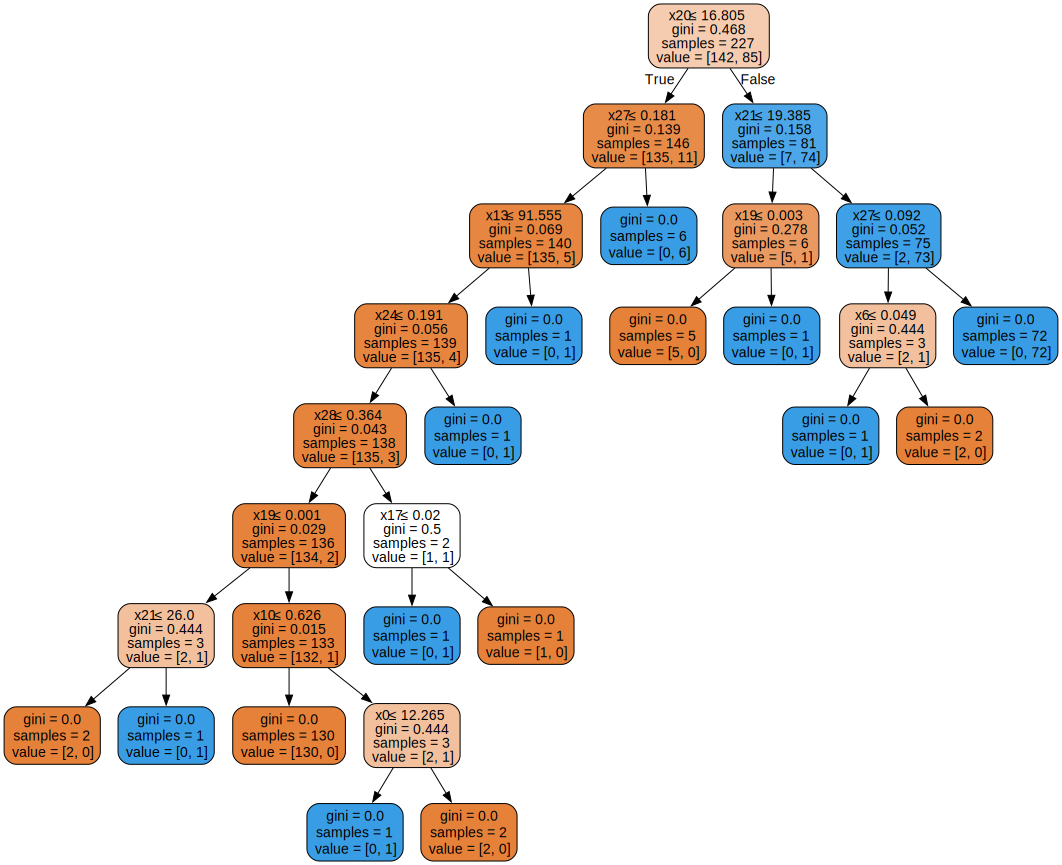

Decision tree for split 1: (0.6, 0.4)


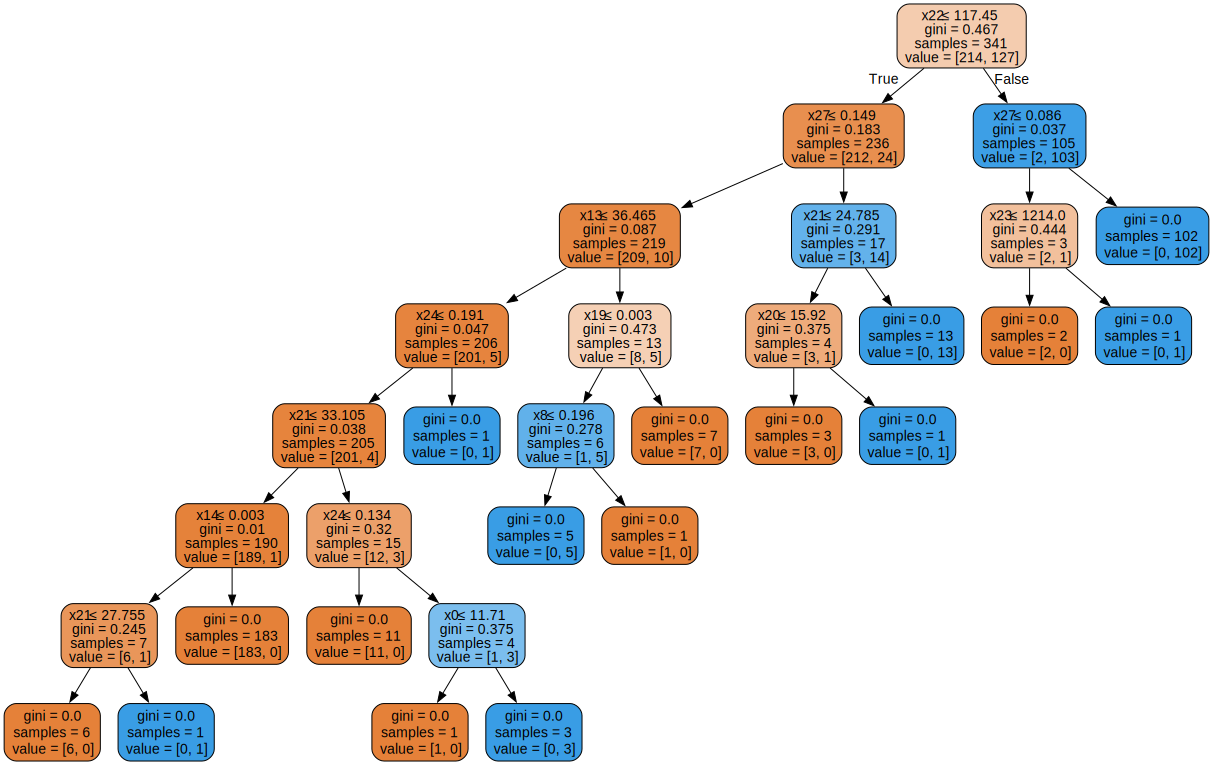

Decision tree for split 2: (0.8, 0.2)


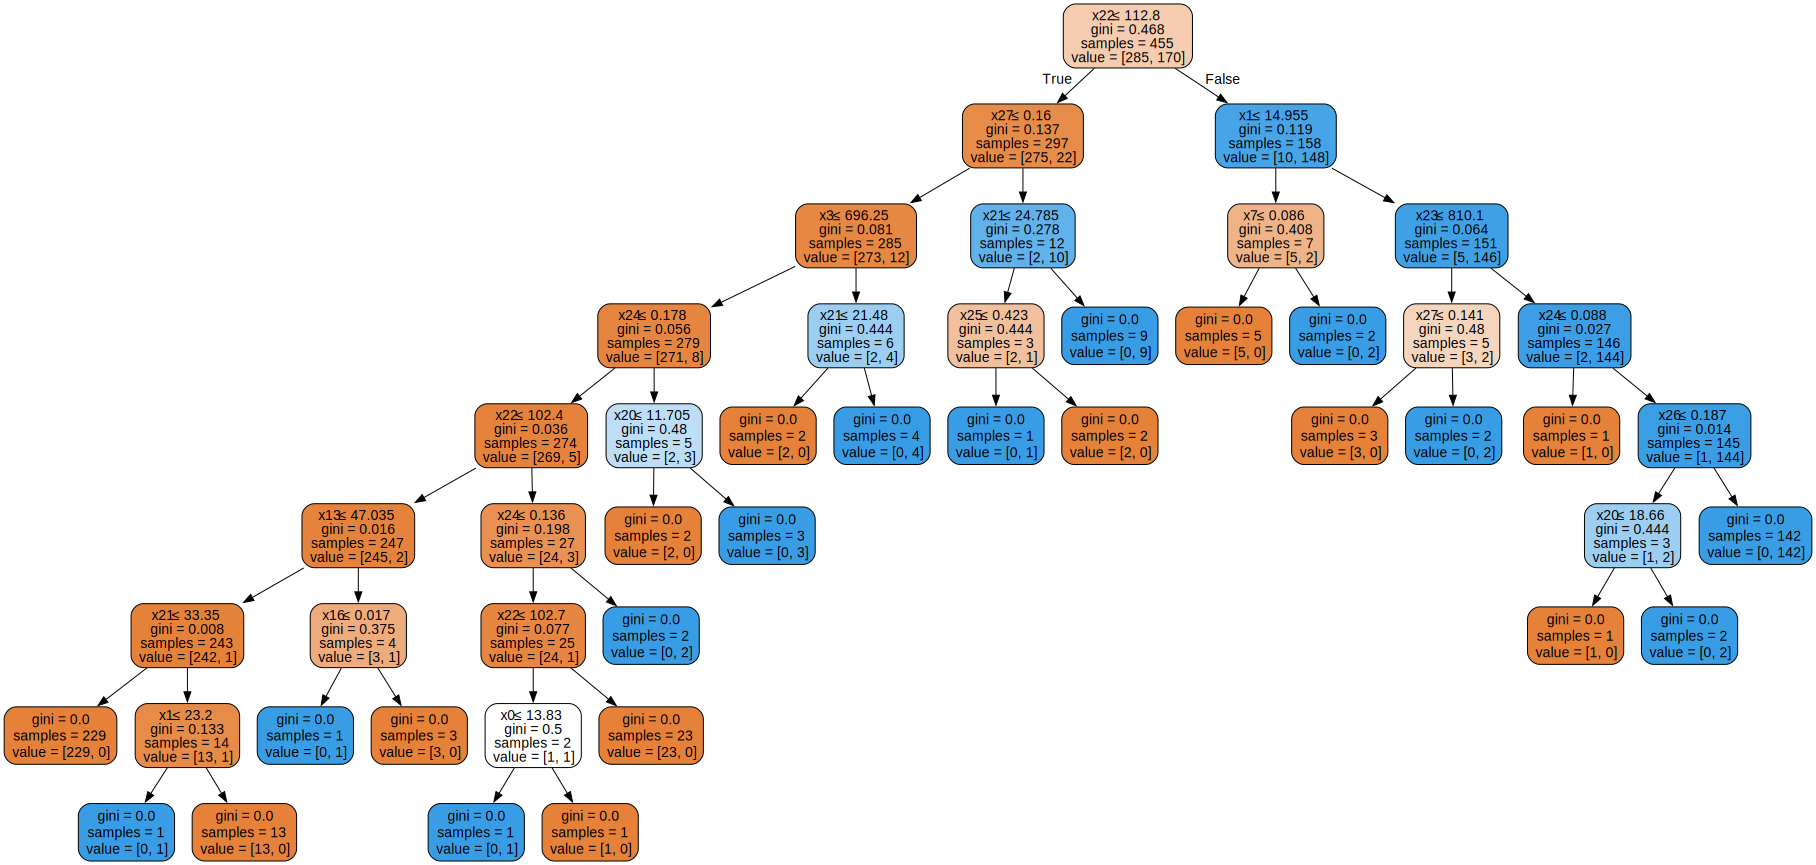

Decision tree for split 3: (0.9, 0.1)


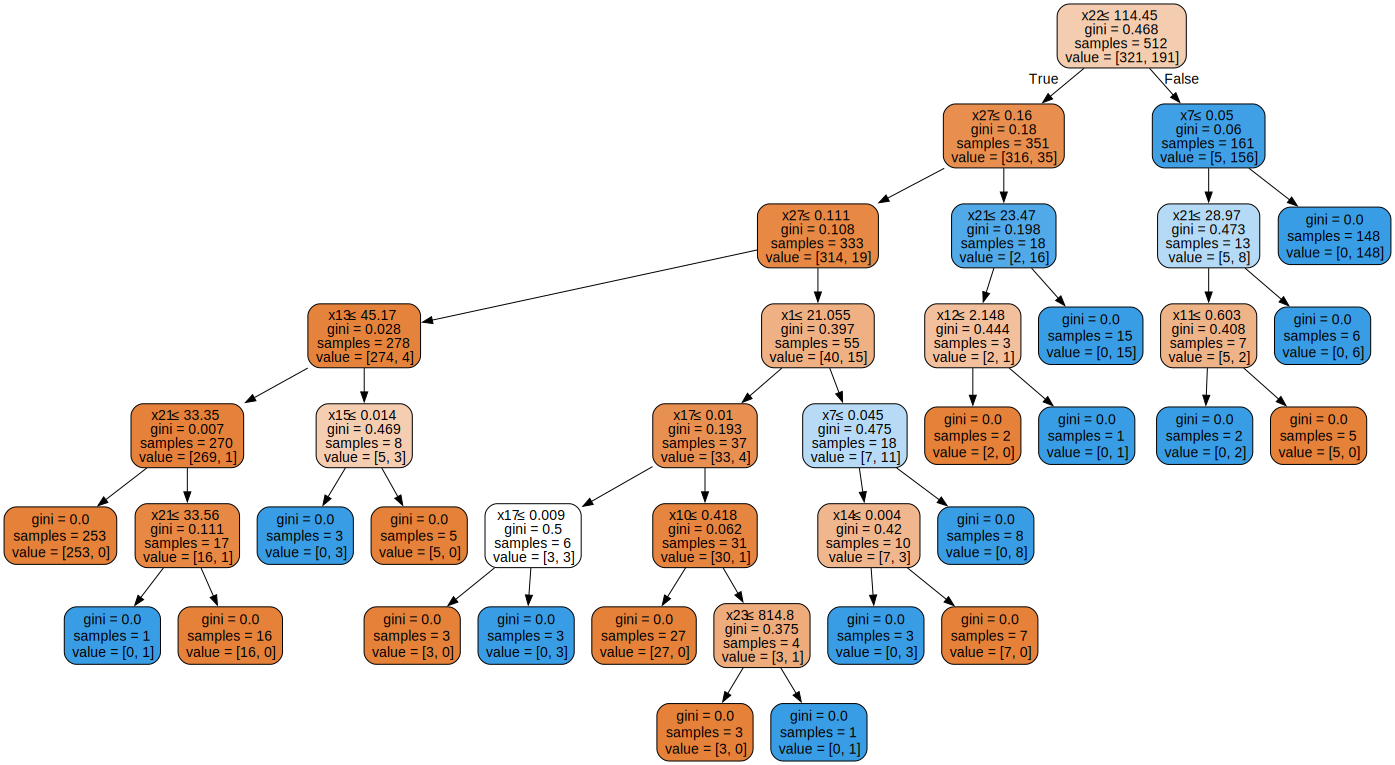

In [158]:
%pip install graphviz
from sklearn import tree  # type: ignore
import graphviz  # type: ignore
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

output_dir = "decision_trees_split"
os.makedirs(output_dir, exist_ok=True)

for i, clf in enumerate(classifiers):
    dot_path = os.path.join(output_dir, f"tree_split_{proportions[i][0]}_{proportions[i][1]}")
    dot_data = tree.export_graphviz(
        clf, out_file=None, filled=True, rounded=True, special_characters=True
    )
    graph = graphviz.Source(dot_data)
    graph.render(dot_path, format="png", cleanup=True)
    print(f"Decision tree for split {i}: {proportions[i]}")
    display(graph) # Display the decision tree

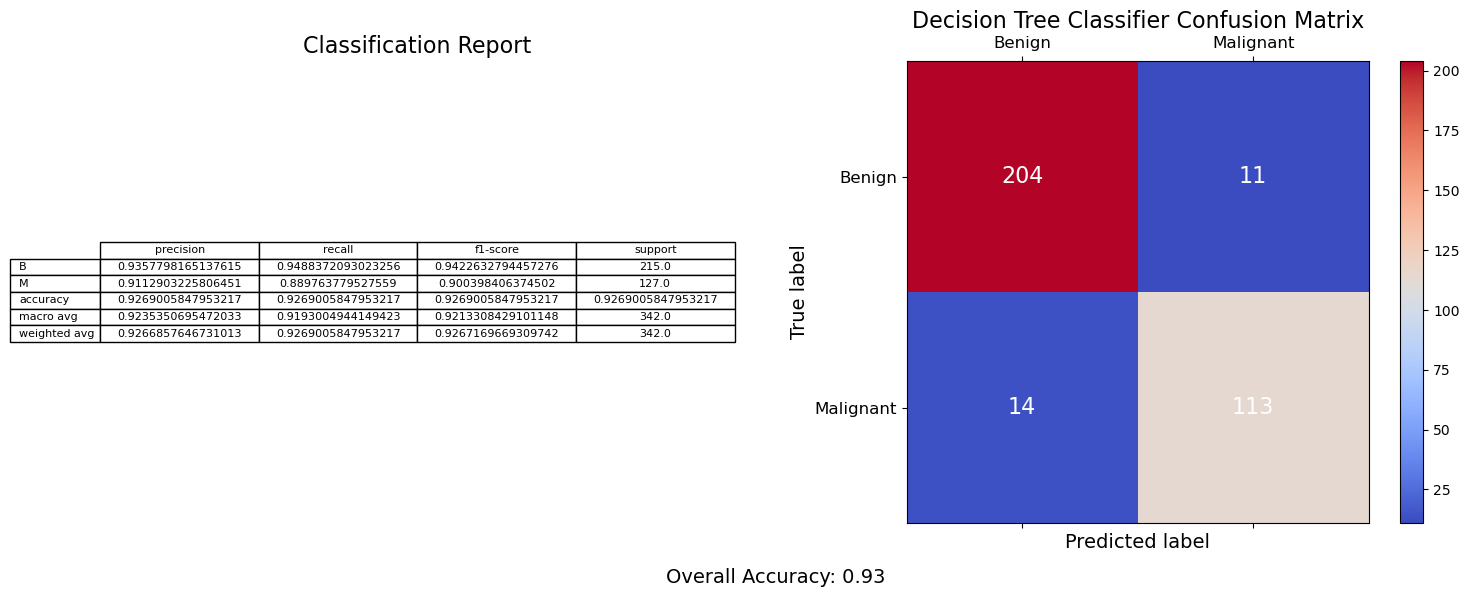

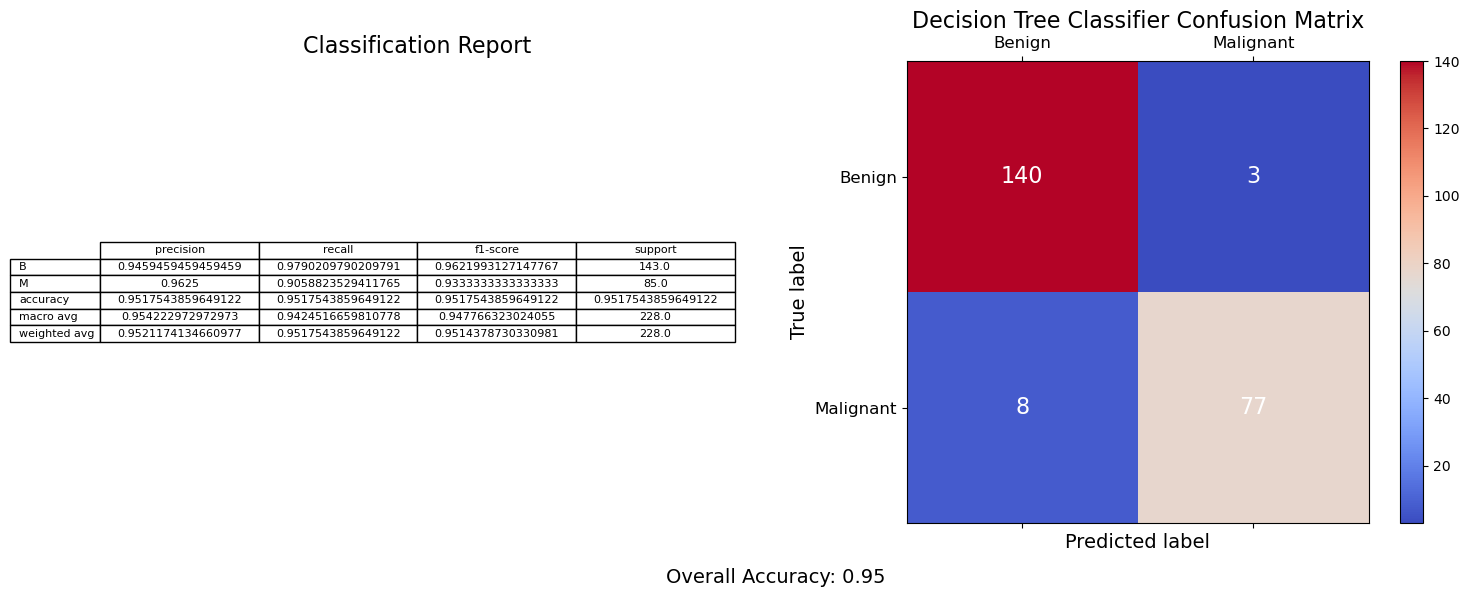

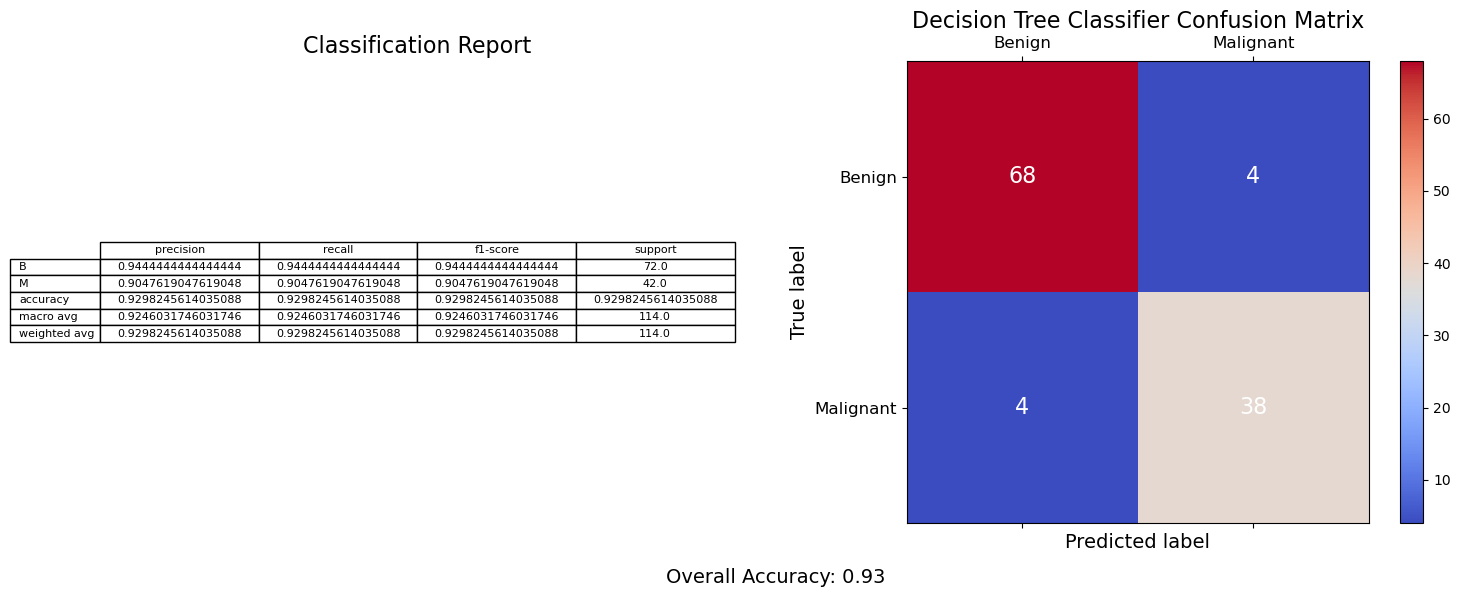

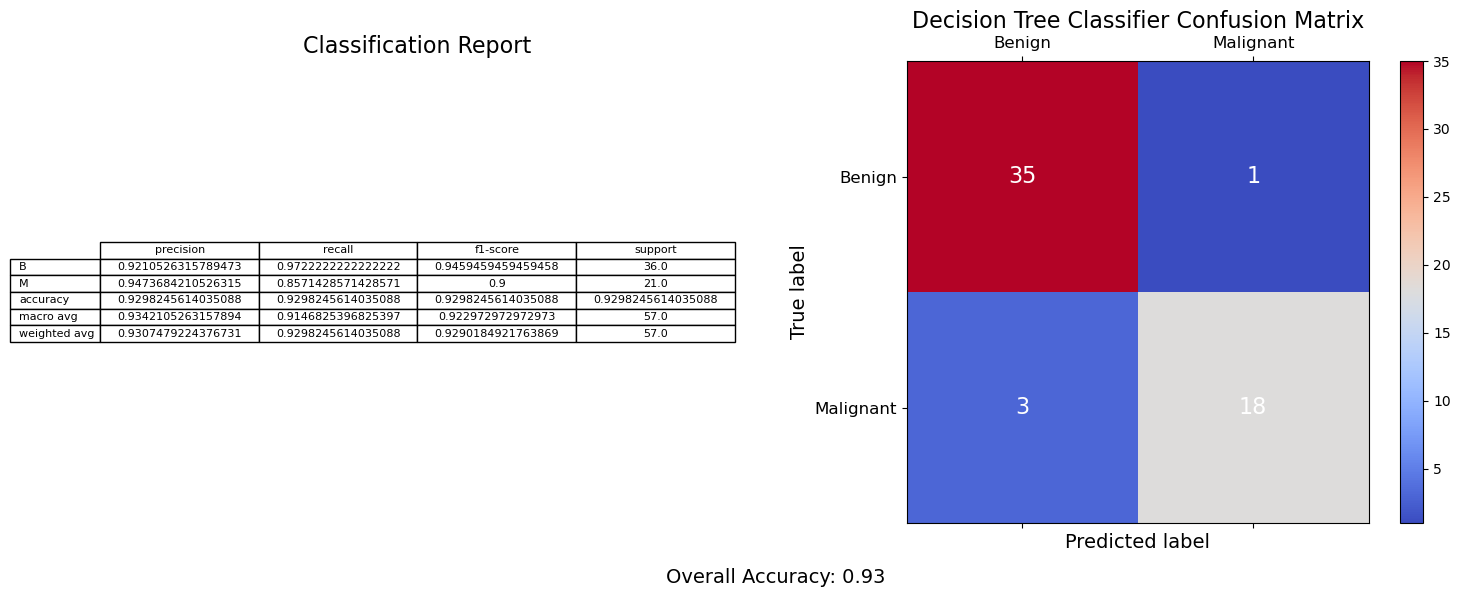

In [159]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # type: ignore

# Evaluate the performance of each classifier
for clf, (X_train, X_test, y_train, y_test) in zip(classifiers, data_splits):
    y_pred = clf.predict(X_test)

    # Get the classification report and confusion matrix
    report = classification_report(y_test, y_pred, output_dict=True)
    matrix = confusion_matrix(y_test, y_pred)

    # Convert classification report to DataFrame for easier display
    report_df = pd.DataFrame(report).transpose()

    # Plot the confusion matrix and classification report
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))

    # Confusion Matrix using matshow
    cax = ax[1].matshow(matrix, cmap="coolwarm")
    plt.colorbar(cax, ax=ax[1])

    # Annotate each cell with the numeric value
    for (i, j), val in np.ndenumerate(matrix):
        ax[1].text(j, i, f"{val}", ha="center", va="center", color="white", fontsize=16)

    ax[1].set_title("Decision Tree Classifier Confusion Matrix", fontsize=16)
    ax[1].set_xlabel("Predicted label", fontsize=14)
    ax[1].set_ylabel("True label", fontsize=14)

    # Set ticks
    ax[1].set_xticks([0, 1])
    ax[1].set_yticks([0, 1])
    ax[1].set_xticklabels(["Benign", "Malignant"], fontsize=12)
    ax[1].set_yticklabels(["Benign", "Malignant"], fontsize=12)

    # Classification Report
    ax[0].axis("off")
    ax[0].axis("tight")
    ax[0].table(
        cellText=report_df.values,
        colLabels=report_df.columns,
        rowLabels=report_df.index,
        cellLoc="center",
        loc="center",
        colWidths=[0.25] * len(report_df.columns),
    )
    ax[0].set_title("Classification Report", fontsize=16)

    # Display overall accuracy
    plt.figtext(
        0.5,
        0.01,
        f"Overall Accuracy: {accuracy_score(y_test, y_pred):.2f}",
        ha="center",
        fontsize=14,
    )

    plt.show()

Decision tree for depth None


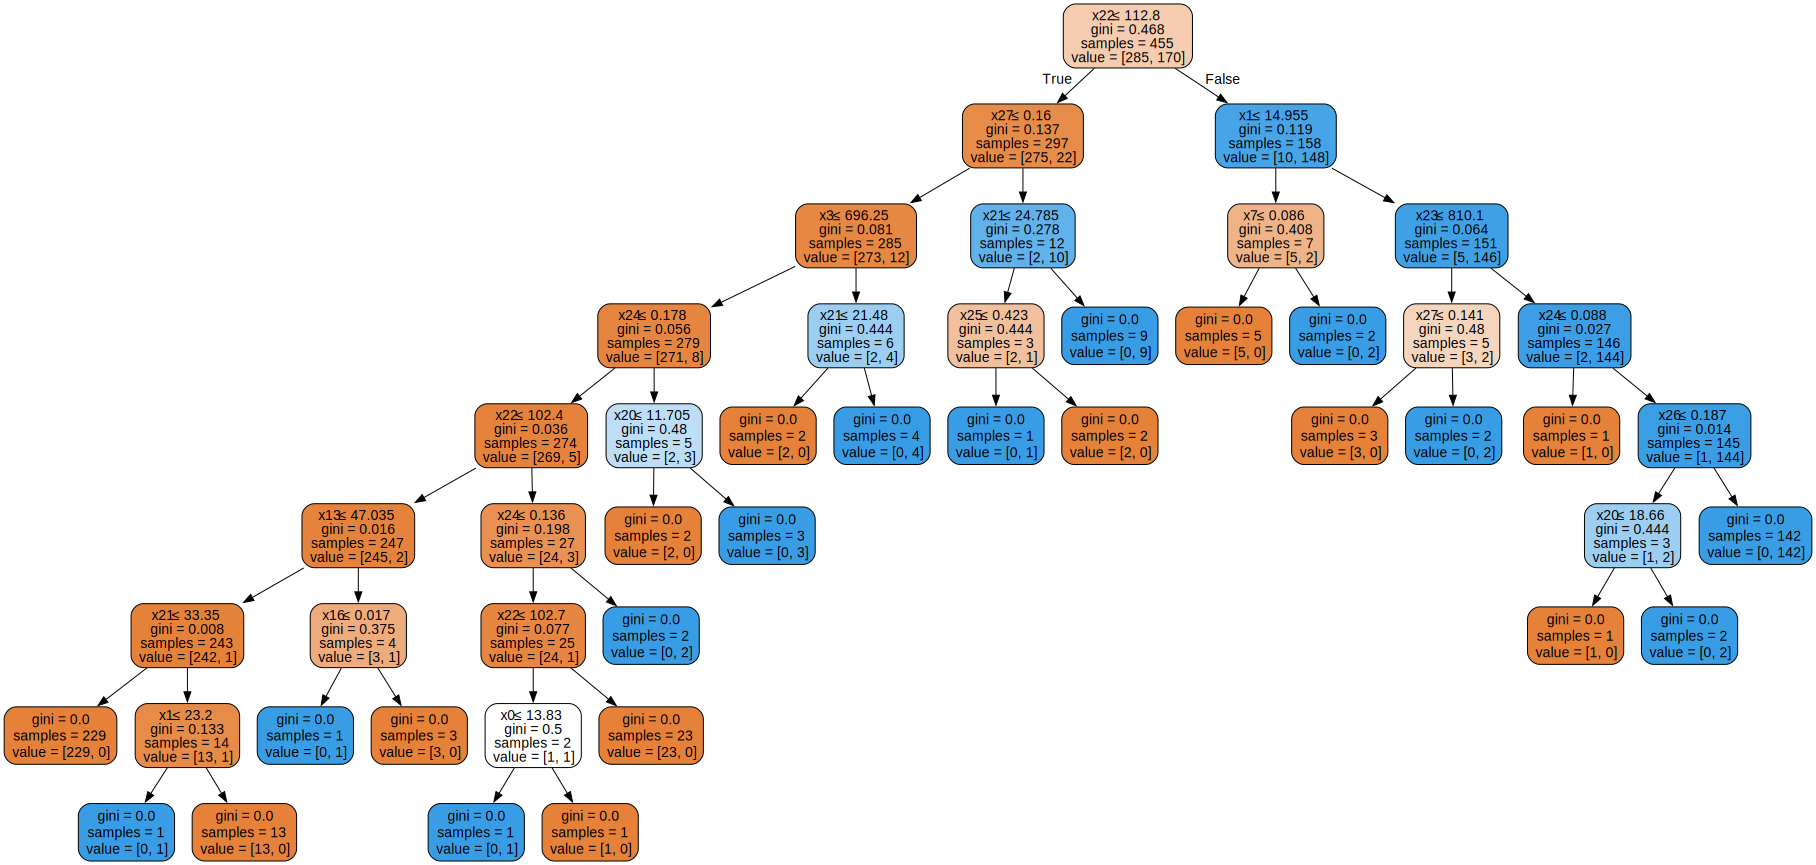

Decision tree for depth 1


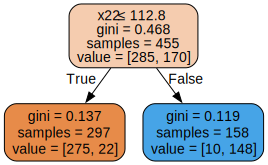

Decision tree for depth 2


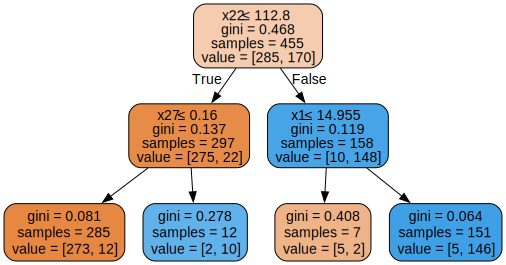

Decision tree for depth 3


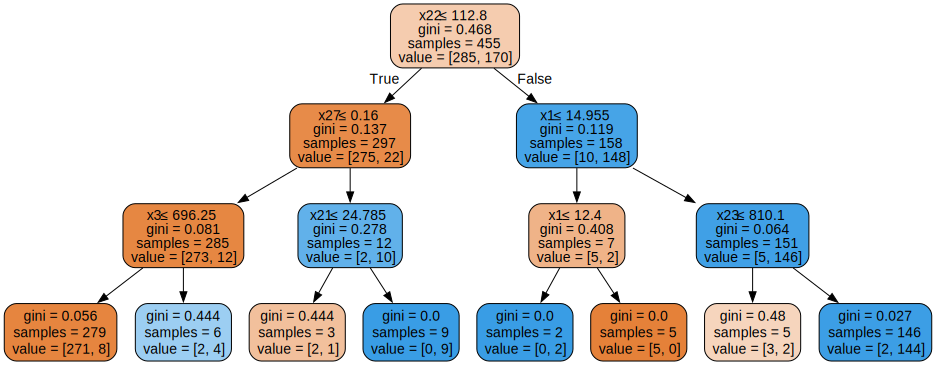

Decision tree for depth 4


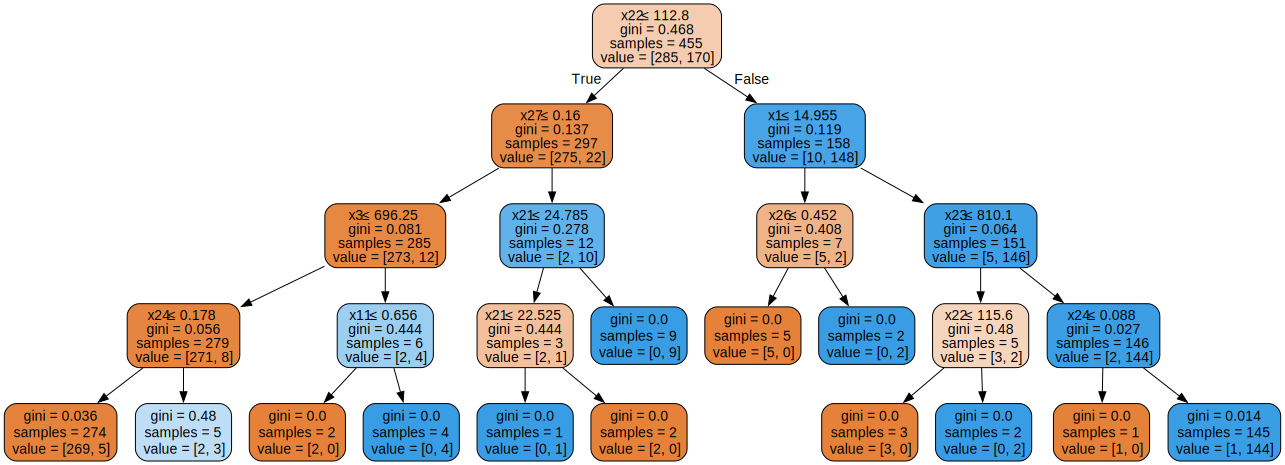

Decision tree for depth 5


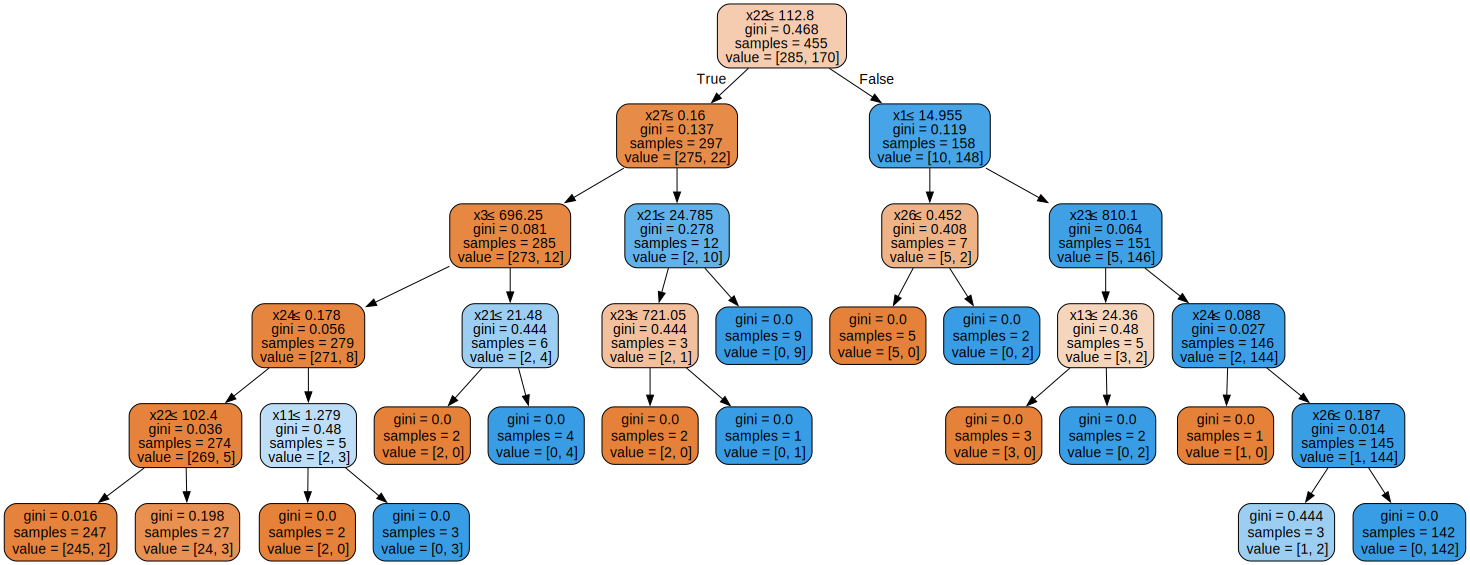

Decision tree for depth 6


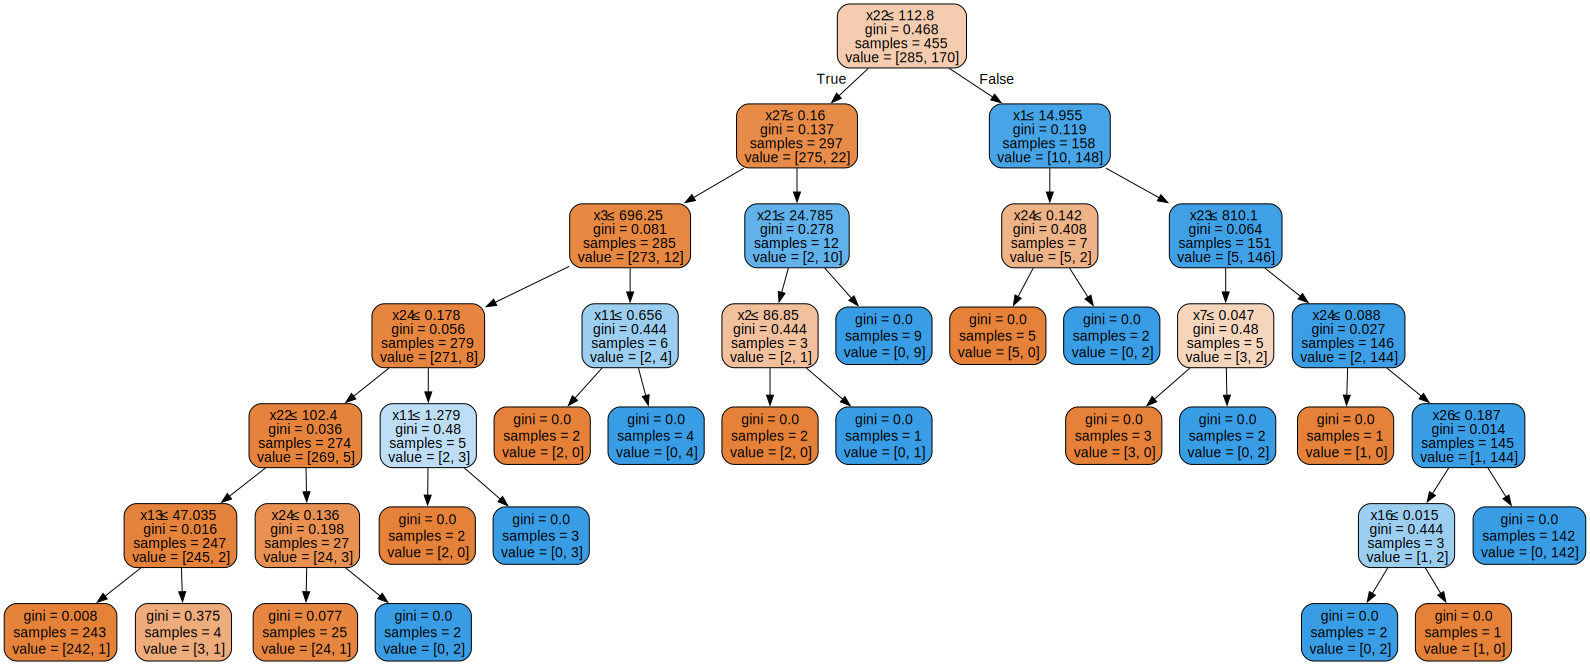

Decision tree for depth 7


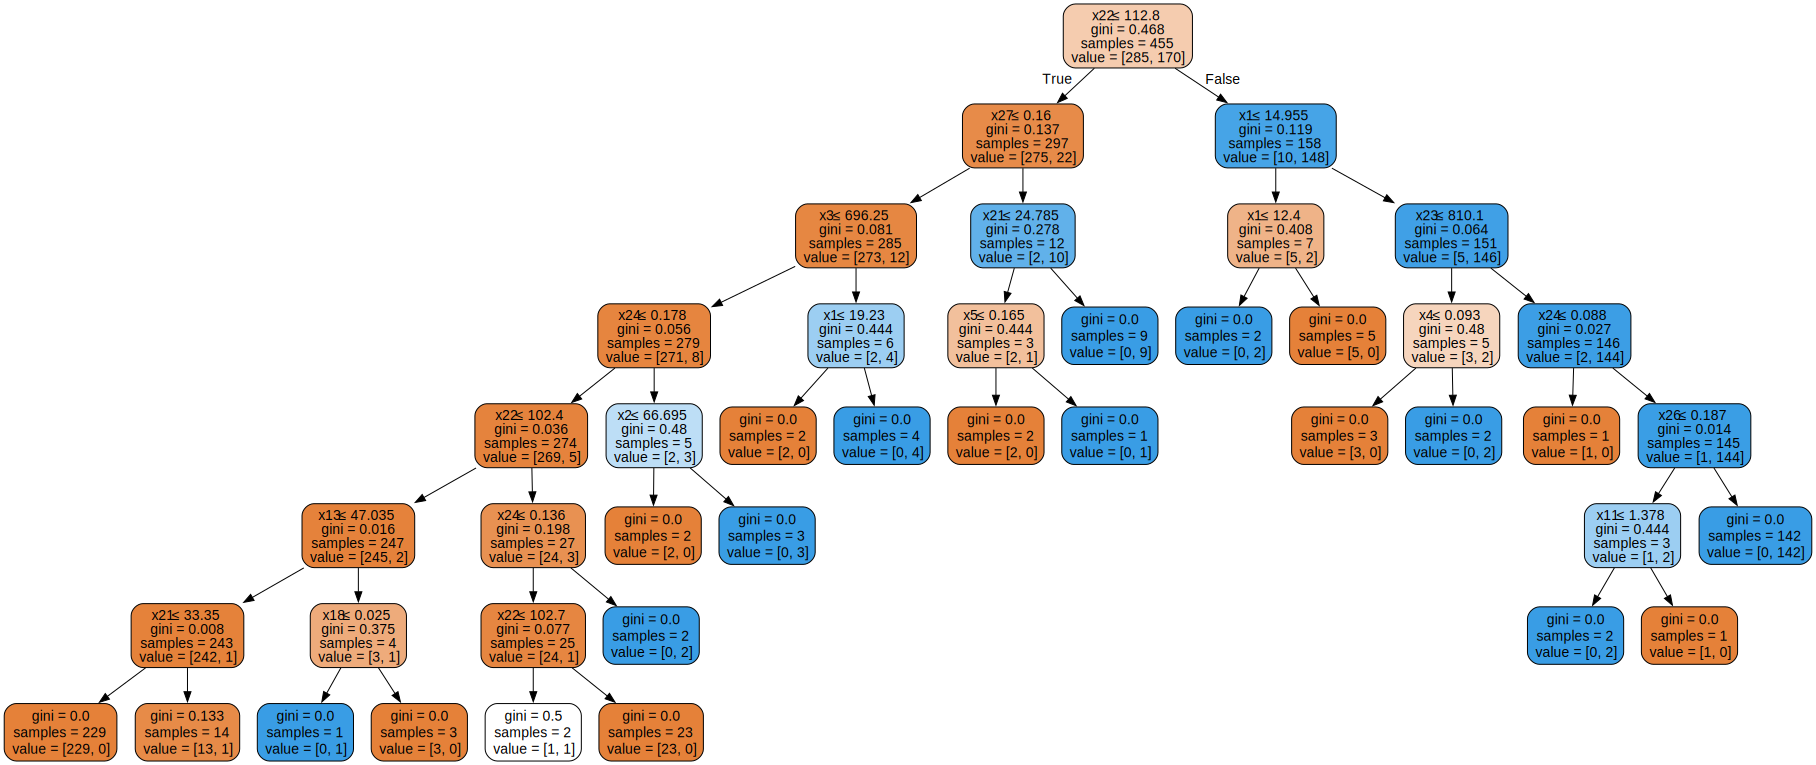

Decision tree for depth 8


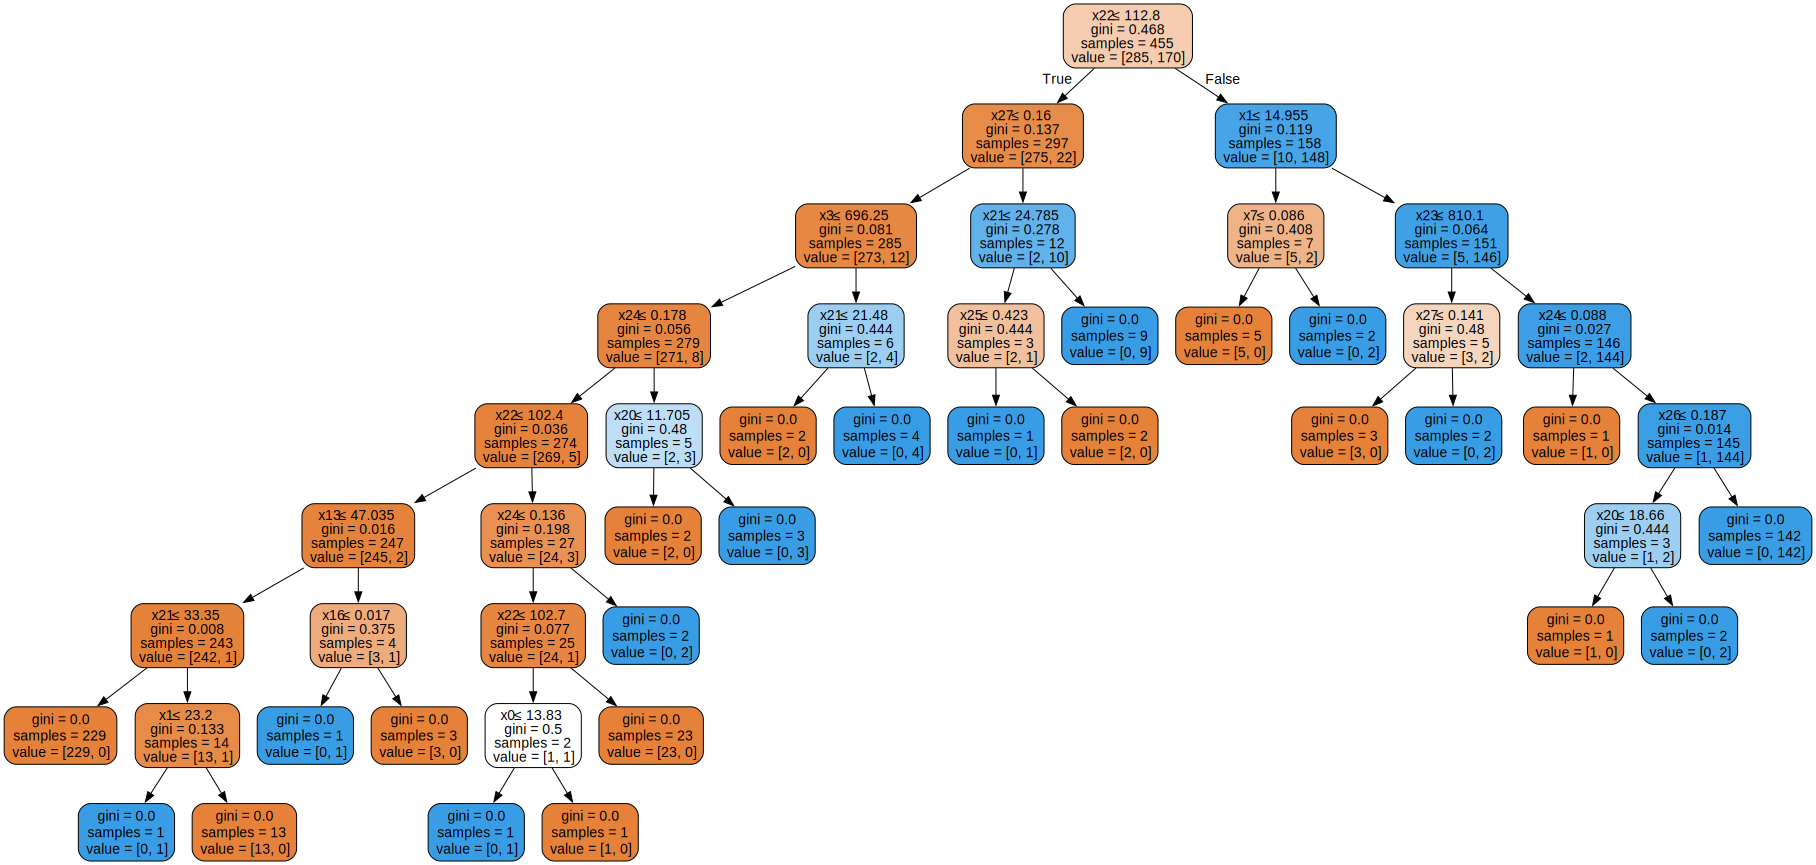

Decision tree for depth 9


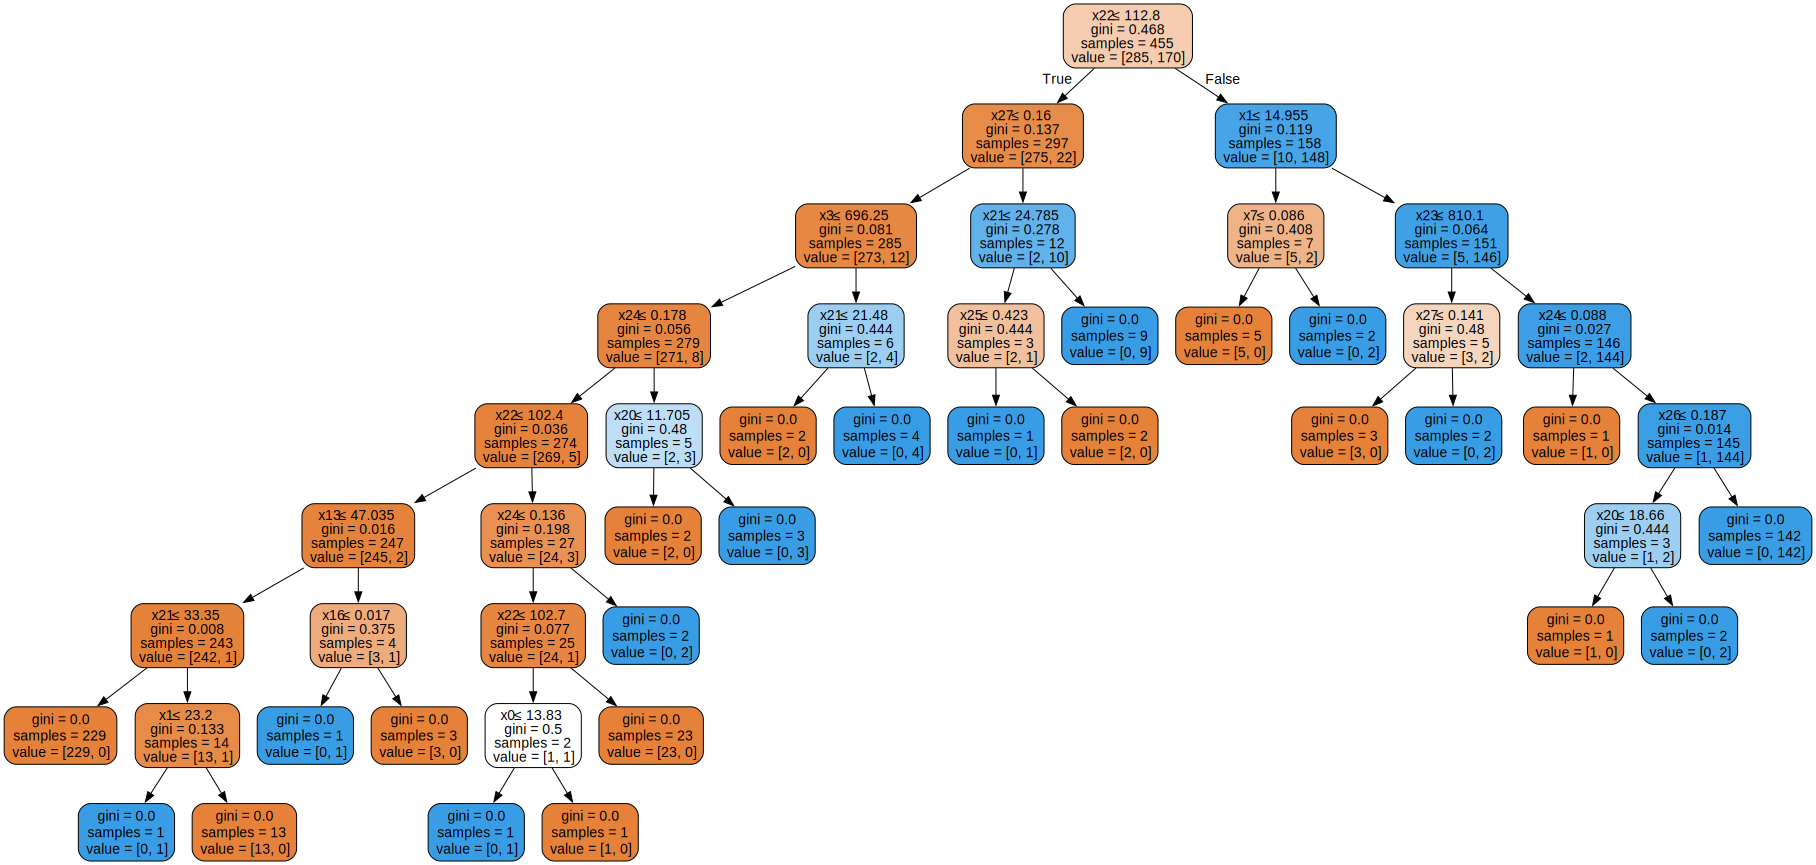

Decision tree for depth 10


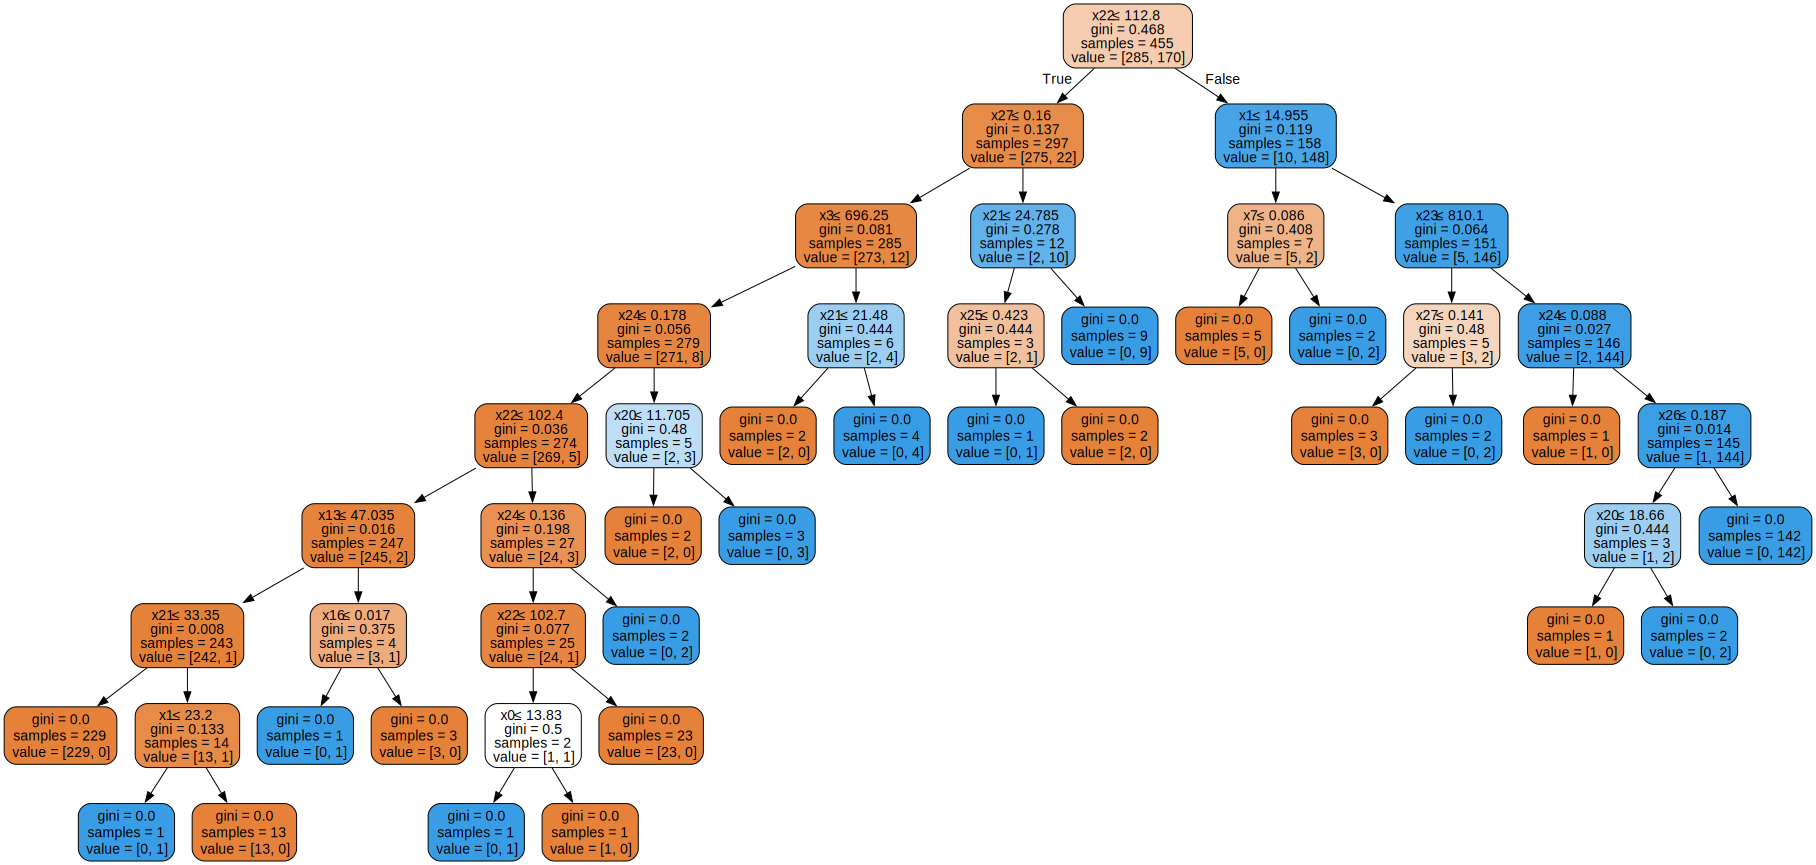

    Max Depth  Accuracy
0         NaN  0.929825
1         1.0  0.877193
2         2.0  0.921053
3         3.0  0.903509
4         4.0  0.912281
5         5.0  0.921053
6         6.0  0.921053
7         7.0  0.938596
8         8.0  0.929825
9         9.0  0.929825
10       10.0  0.929825


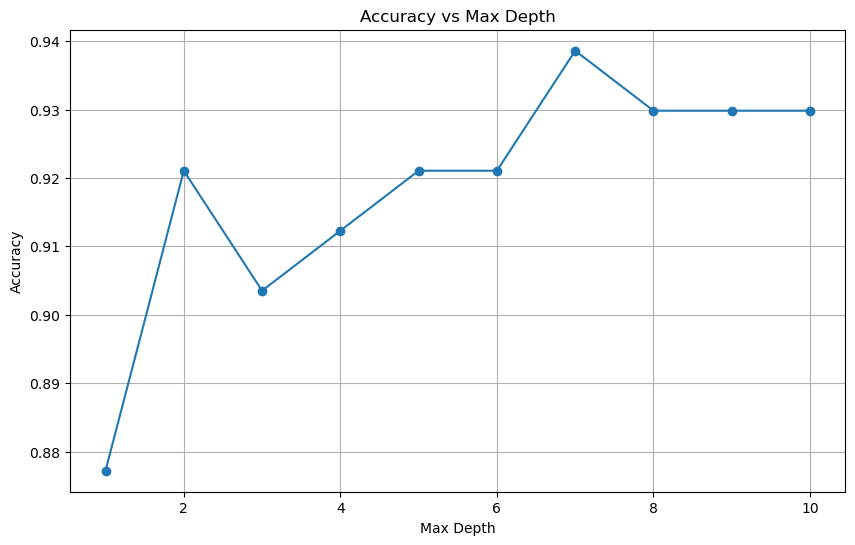

In [160]:
from sklearn.metrics import accuracy_score

# Experiment with different tree depths and measure accuracy
depths = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_scores = []

output_dir = "decision_trees_depth"
os.makedirs(output_dir, exist_ok=True)

for depth in depths:
    # Train a Decision Tree Classifier with a specified max depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(
        data_splits[2][0], data_splits[2][2]
    )  # Using the third data split (0.8/0.2)
    y_pred = clf.predict(data_splits[2][1])
    accuracy = accuracy_score(data_splits[2][3], y_pred)
    accuracy_scores.append(accuracy)

    dot_path = os.path.join(output_dir, f"tree_depth_{depth}")
    # Visualize the decision tree for the current depth
    dot_data = tree.export_graphviz(
        clf,
        out_file=None,
        filled=True,
        rounded=True,
        special_characters=True,
    )
    graph = graphviz.Source(dot_data)
    graph.render(dot_path, format="png", cleanup=True)
    print(f"Decision tree for depth {depth}")
    display(graph)  # Display the decision tree

# Create a DataFrame to store max_depth and accuracy
df_accuracy = pd.DataFrame({"Max Depth": depths, "Accuracy": accuracy_scores})

# Display the table
print(df_accuracy)

# Plotting the accuracy as a function of max_depth
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracy_scores, marker="o")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Max Depth")
plt.grid(True)
plt.show()